In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot


# Making Prediction from Supervised Machine Learning Algorithm

### Author Name :      Sayera Hafsa

### Internship Domain: Data Science and Business Analyst 

### Comapany name:    GRIP- The Spark Foundation

### Task Description:    Prediction from supervised machine learning 

### Solution : Prediction of scores depending on the hours spend on studies also predict 
###                   the scores of a student when he/she spend 9.25 hours per day studying.

## Importing the dataset from a CSV file

In [349]:
dataset = pd.read_csv('http://bit.ly/w-data')

In [350]:
dataset.shape # 25 rows and 2 columns

(25, 2)

In [351]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# # Description  of the dataset with its mean, std,min,max and other percentage details about the dataset being evaluated

In [352]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# # Pictorically displaying the Number of Hours studied vs Percentage

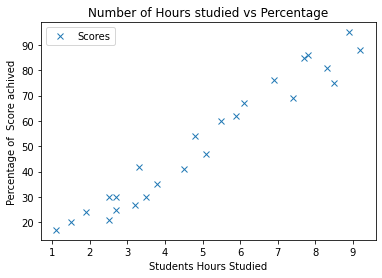

In [353]:
dataset.plot(x='Hours', y='Scores', style='x')
plot.title('Number of Hours studied vs Percentage')
plot.xlabel('Students Hours Studied')
plot.ylabel('Percentage of  Score achived')
plot.show()

# #data presentation using histogram

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

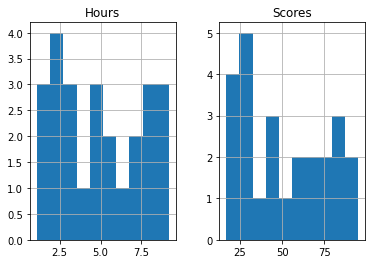

In [354]:
dataset.hist()

In [355]:
X = dataset.iloc[:, :-1].values # -1 ,this is the range for the column we will pick
# as this set will have all the columns except the last one which is score 
y = dataset.iloc[:, 1].values

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#train_test_split function randomly splits data into train and test sets

In [357]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)# this  retrieve the intercept resulting value
#linear regression model basically finds the best value for the intercept and slope,
#which results in a line that best fits the data.

2.018160041434683


In [358]:
print(regressor.coef_) # this will show the slope and retrieving the slope for (coefficient of x)

[9.91065648]


In [359]:
# This means that for every one unit of change in hours studied, 
# the change in the score is about 9.91%.
y_pred = regressor.predict(X_test)
newdf = pd.DataFrame({'Actual % score': y_test, 'Predicted % scores': y_pred}) #newdf is the new object 

In [360]:

newdf

,Actual % score,Predicted % scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [361]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# Data visualisaation with bar chart and ploting

Data showed in bar char


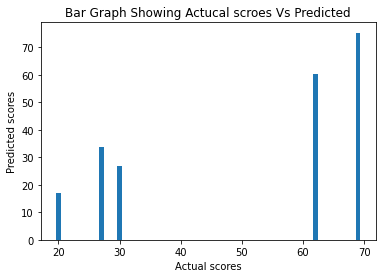

<AxesSubplot:>

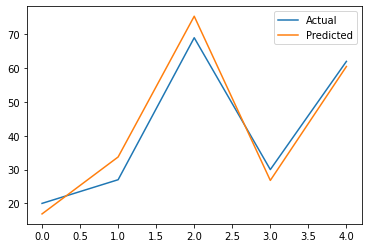

In [362]:
# creating a bar graph for the actucal and prediction
x= y_test
y= y_pred
plot.bar(x,y)
plot.title('Bar Graph Showing Actucal scroes Vs Predicted')
plot.xlabel('Actual scores')
plot.ylabel('Predicted scores')
print("Data showed in bar char")
plot.show()
df.plot()


In [363]:
#You can see that the value of root mean squared error is 4.64
# which is less than 10% of the mean value of the percentages of all the students i.e. 51.48.
# This means that our ML algorithm did a good job.

# Prediction of scores for 9.25 hours of study

In [364]:
stu1hours=[[9.25]]
prediction=regressor.predict(stu1hours)
print(prediction)

[93.69173249]


## Printing in a user created table the predicted values


In [365]:
from prettytable import PrettyTable

#Color
R = "\033[0;31;40m" #RED
G = "\033[0;32;40m" # GREEN
Y = "\033[0;33;40m" # Yellow
B = "\033[0;34;40m" # Blue
N = "\033[0m" # Reset

#t = PrettyTable(['Hours studied', 'score'])
#t.add_row(['9.25', G+prediction+N])
a = str(prediction)
b = "Failed"
t = PrettyTable(['Hour', 'score'])

#Printing a tabe with the predicted data for 9.25 hours of study
t.add_row(['9.25', Y+a+N])
print(t)

+------+---------------+
| Hour |     score     |
+------+---------------+
| 9.25 | [93.69173249] |
+------+---------------+
